In [165]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [166]:
df_wine = pd.read_csv('wine.data',header=None)

columns_list = columns_list = ['label',
                   'alcohol',
                   'malic acid',
                   'ash',
                   'alcalinity of ash',
                   'magnesium',
                   'total phenols',
                   'flavanoids',
                   'nonflavanoid phenols',
                   'proanthocyanins',
                   'color intensity',
                   'hue',
                   'od280/od315 of diluted wines',
                   'proline']

df_wine.columns = columns_list

In [167]:
# splitting the data into training and test data
x = df_wine.iloc[:,1:]
y = df_wine['label']

x_train,x_test,y_train,y_test = train_test_split(x,y, 
                                                 test_size=0.3,
                                                 stratify=y,
                                                 random_state=0)

In [168]:
# standardization of the training set
std = StandardScaler()
x_train_std = pd.DataFrame(std.fit_transform(x_train))

features_list = [x for x in columns_list if x != 'label']

x_train_std.columns = features_list

In [169]:
# standardization of the test dataset

x_test_std = pd.DataFrame(std.fit_transform(x_test))
x_test_std.columns = features_list

## Fit a logistic regression model

In [170]:
lr = LogisticRegression(penalty='l1',
                        C=1.0,                  ## here, c = 1.0 is a default.  You can increase it or decrease it to make the regularization effect stronger or weaker, respectively
                        solver='liblinear',
                        multi_class='ovr')

In [171]:
lr.fit(x_train_std,y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'ovr'


In [172]:
print('Training set classification score:',lr.score(x_train_std,y_train)*100,'%')

Training set classification score: 100.0 %


In [173]:
print('Classification accuracy on the test data is:', lr.score(x_test_std,y_test)*100,'%')

Classification accuracy on the test data is: 100.0 %


In [174]:
lr.intercept_

array([-1.26328834, -1.21591162, -2.37013034])

In [175]:
# here, there are 3 rows because the 'ovr' option was used in the logistic regression fit.
# the 'ovr' option (since there are 3 classes) classifies class1 vs class2 and 3, then class2 vs class 1 and 3, etc.  This is why there are 3 coefficients for each feature(variable)
# notice the features that are 0 weights(ceofficients) for the entire column.  These variables are not needed, which is why the L1 regularization forced these to 0 - equivalent to selecting using p-values manually.

# NOTE: the features having 0 for every row, does NOT mean the model is sparse.  There still could be overfitting.....
# more zero features can be added by increasing the regularization strength (changing the C value to something very small will yeild all 0's)
pd.DataFrame(lr.coef_)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.245954,0.180183,0.742964,-1.159802,0.0000,0.0,1.167185,0.0,0.0,0.000000,0.000000,0.549879,2.510087
1,-1.537186,-0.387148,-0.995576,0.365009,-0.0592,0.0,0.668315,0.0,0.0,-1.934128,1.233884,0.000000,-2.231418
2,0.135760,0.168603,0.357214,0.000000,0.0000,0.0,-2.437835,0.0,0.0,1.563513,-0.818466,-0.492589,0.000000


### Varying the regularization strength and plotting the weight coefficients

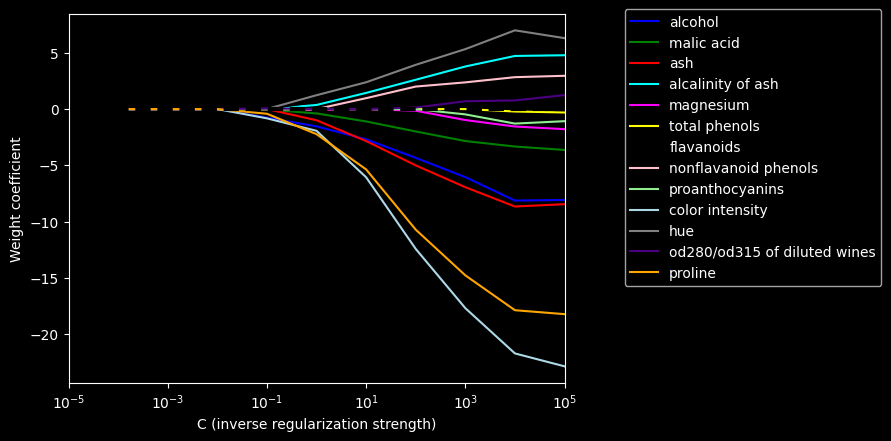

In [176]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue','green','red','cyan',
          'magenta','yellow','black',
          'pink','lightgreen','lightblue',
          'gray','indigo','orange']

weights,params = [], []

for c in np.arange(-4.,6.):
    lr = LogisticRegression(penalty='l1',
                            C=10.**c,
                            solver='liblinear',
                            multi_class='ovr',
                            random_state=0)
    lr.fit(x_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],
             label = df_wine.columns[column + 1],
             color = color)
    
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38,1.03),
          ncol=1,
          fancybox=True)
plt.show()

In [177]:
np.arange(-4.,6.)

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])